# Airline Passenger Satisfaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/train.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [146]:
df.shape

(103904, 25)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Data Cleaning

In [4]:
df = df.drop(columns=['Unnamed: 0', 'id'])
indexes = list(range(6, 20))
df.iloc[:,indexes] = df.iloc[:,indexes].astype('category')
df[['Gender','Customer Type', 'Type of Travel', 'Class']] = df[['Gender','Customer Type', 'Type of Travel', 'Class']].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [6]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

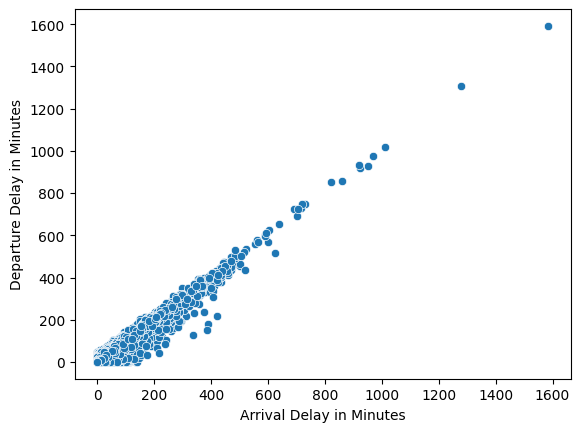

In [7]:
sns.scatterplot(df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes')

In [8]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])

In [9]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Exploratory Data Analysis

In [10]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.245072
std,15.114964,997.147281,38.230901,38.808674
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [11]:
df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


<Axes: xlabel='satisfaction', ylabel='Count'>

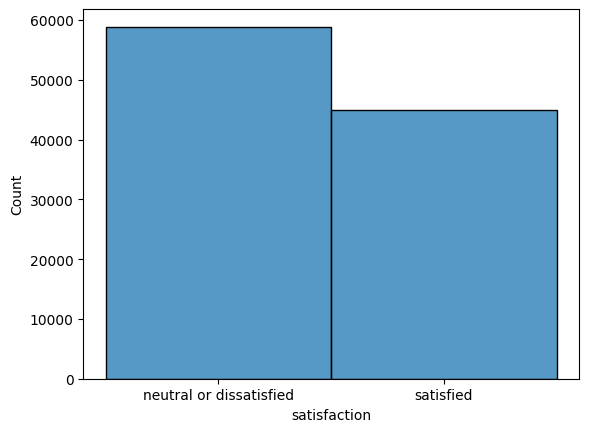

In [12]:
sns.histplot(data=df,x='satisfaction')

In [13]:
indexes = [0,1,3,4] + indexes

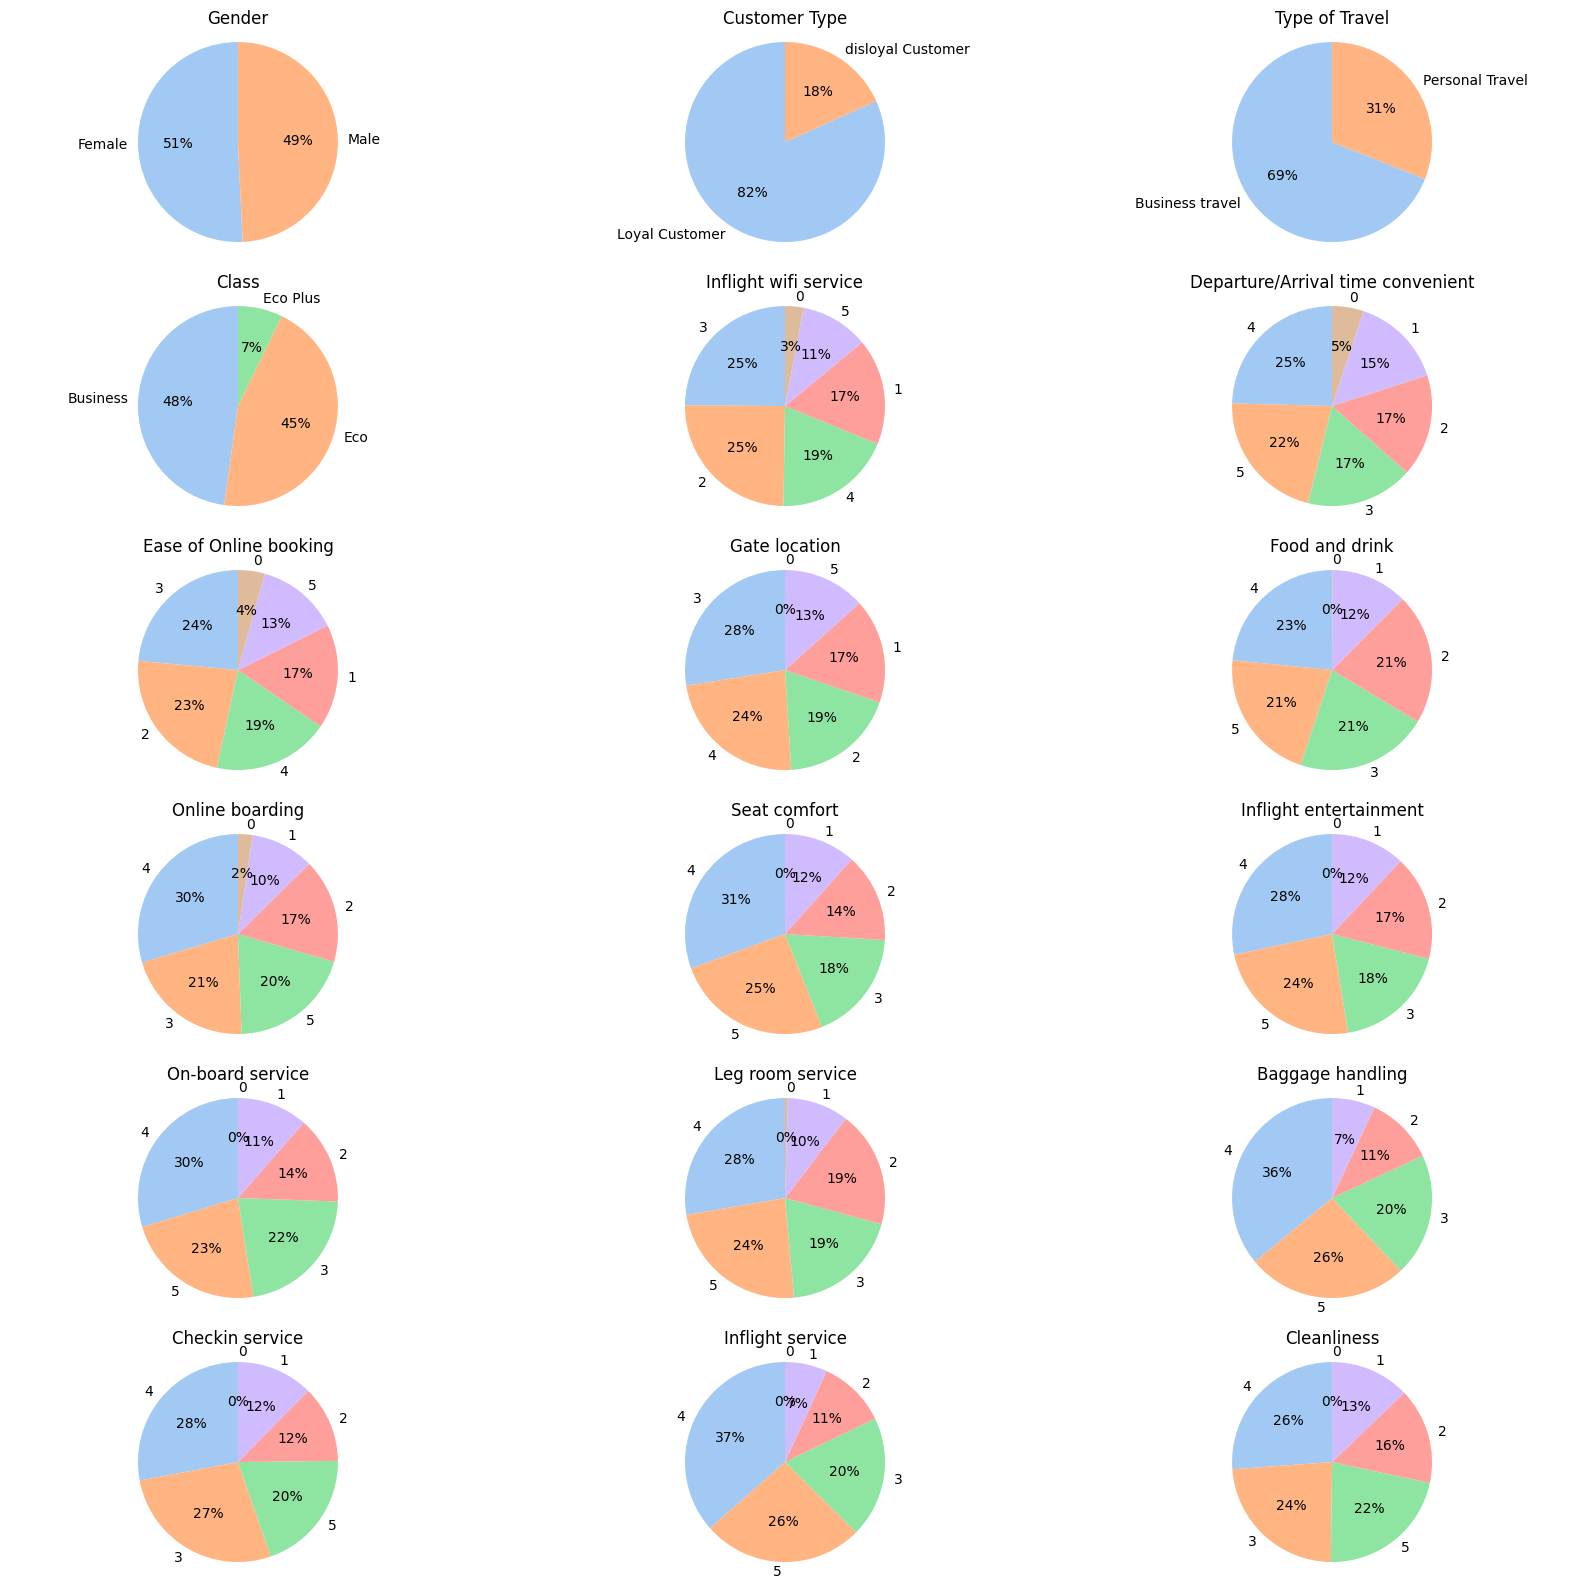

In [14]:

categ = df.iloc[:,indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("pastel"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

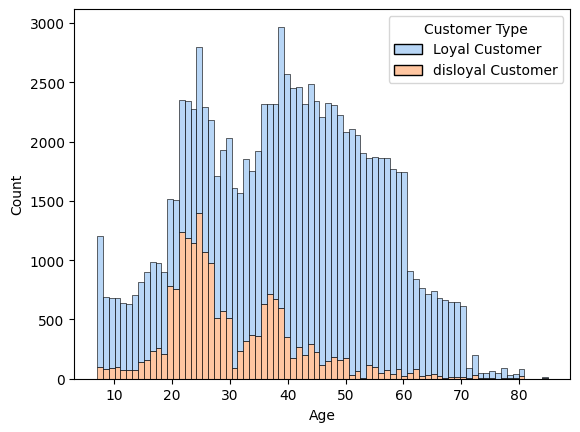

In [15]:
sns.histplot(df,x='Age',hue='Customer Type',multiple='stack',palette='pastel')

<Axes: xlabel='Age', ylabel='Count'>

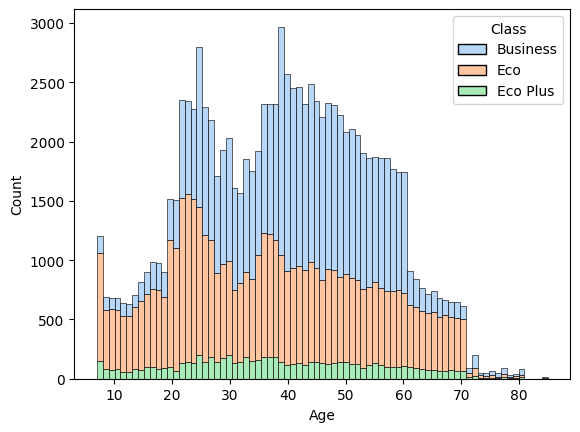

In [16]:
sns.histplot(df,x='Age',hue='Class',multiple='stack',palette='pastel')

<Axes: xlabel='Flight Distance', ylabel='Count'>

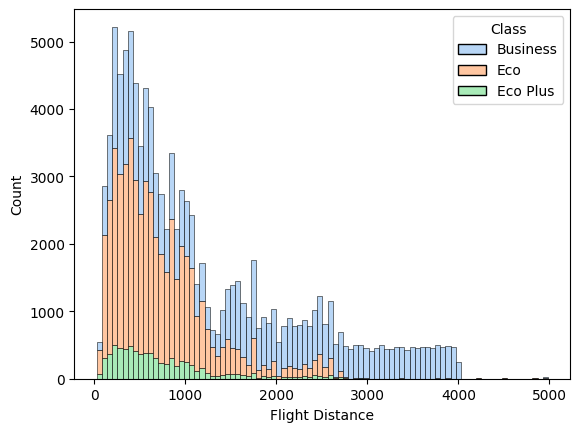

In [17]:
sns.histplot(df,x='Flight Distance',hue='Class',multiple='stack',palette='pastel')

<Axes: xlabel='Gender', ylabel='count'>

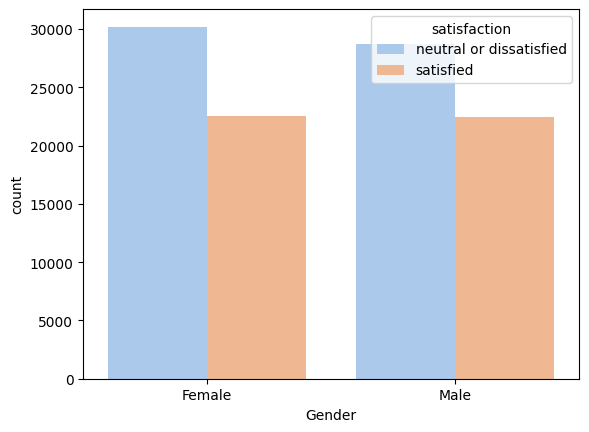

In [18]:
sns.countplot(df,x='Gender',hue='satisfaction',palette='pastel')

<Axes: xlabel='Class', ylabel='count'>

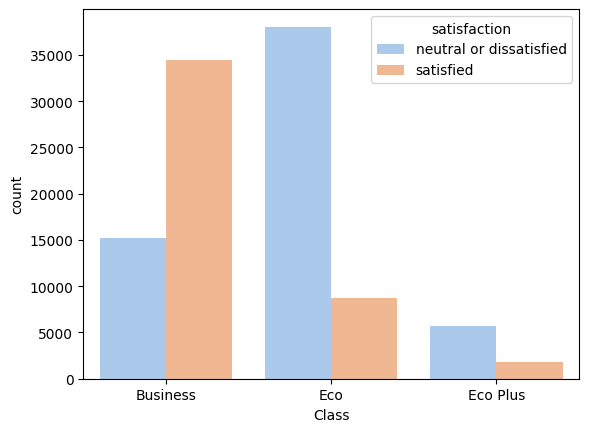

In [162]:
sns.countplot(df,x='Class',hue='satisfaction',palette='pastel')

<Axes: xlabel='Customer Type', ylabel='count'>

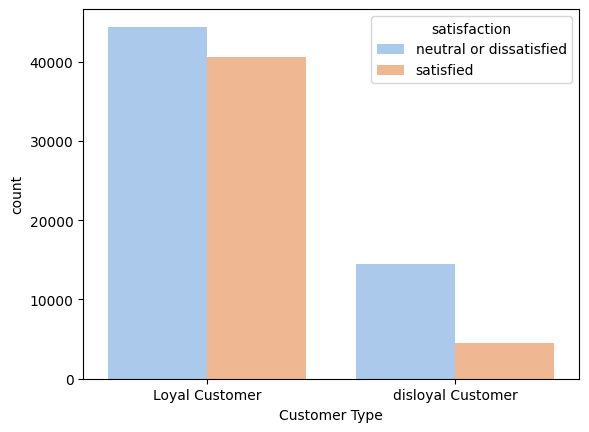

In [19]:
sns.countplot(df,x='Customer Type',hue='satisfaction',palette='pastel')

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

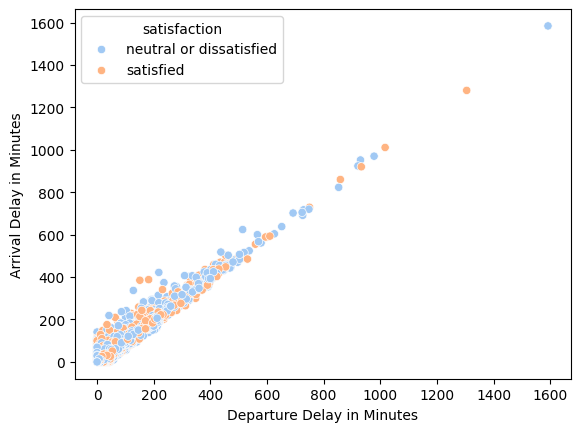

In [20]:
sns.scatterplot(data=df,x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', palette='pastel')

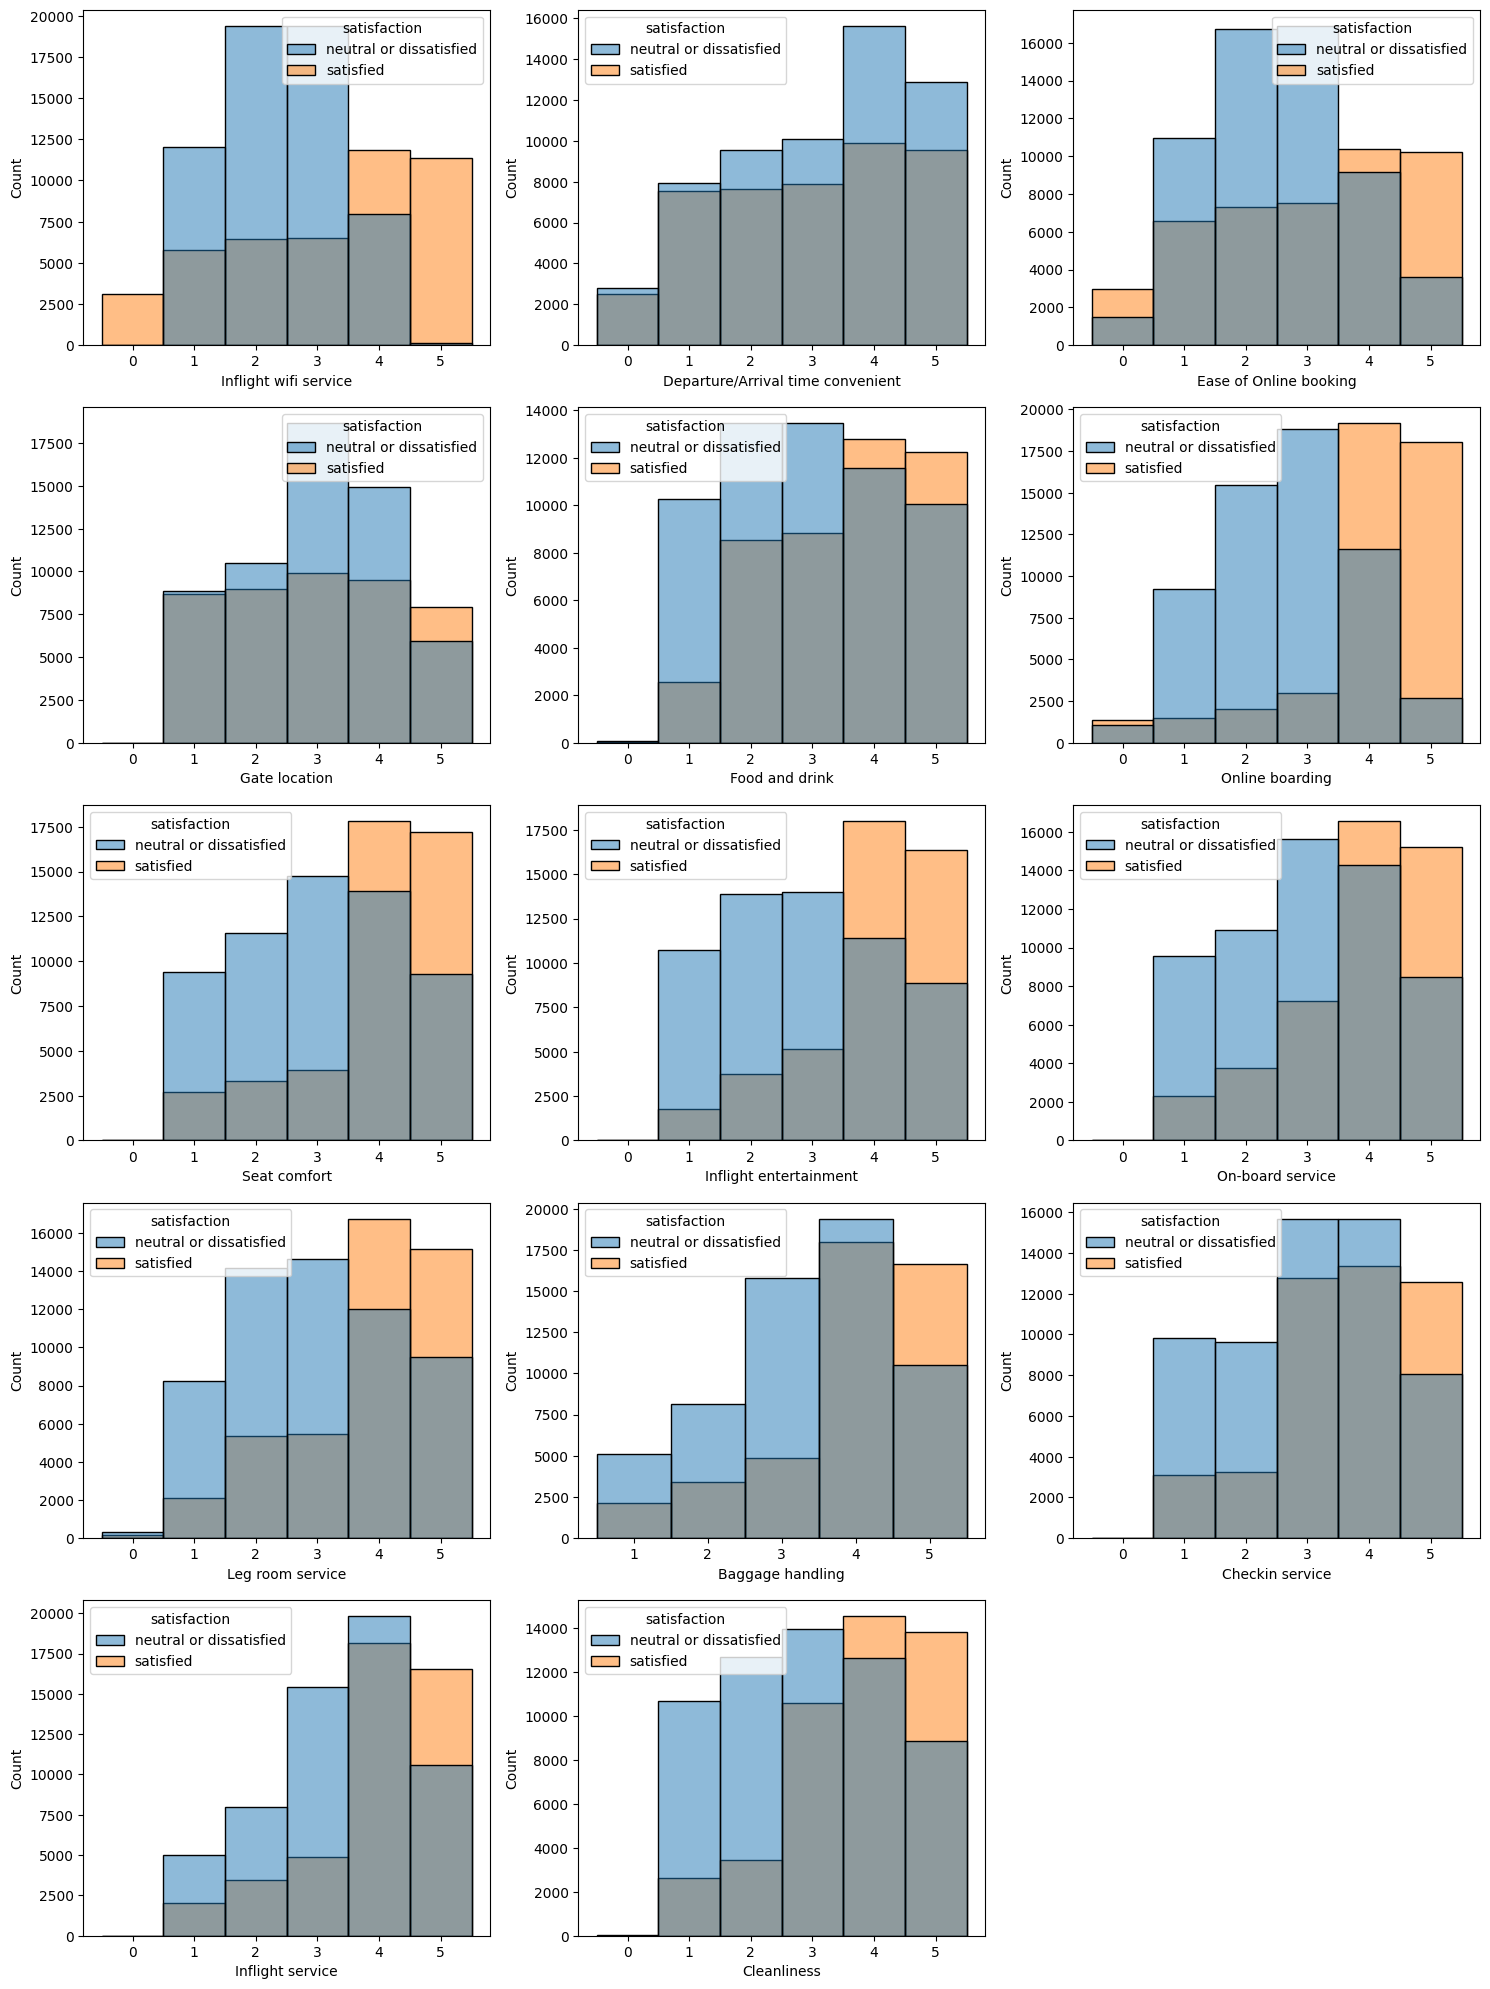

In [28]:
levels = list(range(6,20))
x = df.iloc[:,levels]
column_names = x.columns.tolist()
column_names

n_cols = 3
n_rows = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(column_names):
    sns.histplot(data=df, x=col, hue='satisfaction', ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Wrangling

In [164]:
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'category']
data_describe = df.describe(include = ['category'])

In [165]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [166]:
df_binary = df[binary_columns]
df_binary.head()

,Gender,Customer Type,Type of Travel
0,Male,Loyal Customer,Personal Travel
1,Male,disloyal Customer,Business travel
2,Female,Loyal Customer,Business travel
3,Female,Loyal Customer,Business travel
4,Male,Loyal Customer,Business travel


In [167]:
df_binary['Gender'] = df_binary['Gender'].map({'Male': 1, 'Female': 0})
df_binary['Customer Type'] = df_binary['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df_binary['Type of Travel'] = df_binary['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})

In [168]:
df_binary.head()

,Gender,Customer Type,Type of Travel
0,1,1,1
1,1,0,0
2,0,1,0
3,0,1,0
4,1,1,0


In [169]:
data_nonbinary = pd.get_dummies(df[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [170]:
data_numerical = df[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.245072
std,15.114964,997.147281,38.230901,38.808674
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [171]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [172]:
target = df['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, df_binary), axis = 1)
print(data.shape)

(103904, 93)


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 93 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Age                                  103904 non-null  float64 
 1   Flight Distance                      103904 non-null  float64 
 2   Departure Delay in Minutes           103904 non-null  float64 
 3   Arrival Delay in Minutes             103904 non-null  float64 
 4   Class_Business                       103904 non-null  bool    
 5   Class_Eco                            103904 non-null  bool    
 6   Class_Eco Plus                       103904 non-null  bool    
 7   Inflight wifi service_0              103904 non-null  bool    
 8   Inflight wifi service_1              103904 non-null  bool    
 9   Inflight wifi service_2              103904 non-null  bool    
 10  Inflight wifi service_3              103904 non-null  bool    
 11  

## Classification Methods

In [174]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 40)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93513, 10391)

### K-Nearest Neighbors

In [178]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 10)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
accuracy = accuracy_score(y_test, knn.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)
print(f"Accuracy: {accuracy: .3f}")

Training sample error:  0.052698555281083914
Error on the test sample:  0.06419016456548937
Accuracy:  0.936


### Random Forest

In [181]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
accuracy = accuracy_score(y_test, rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)
print(f"Accuracy: {accuracy: .3f}")

Training sample error:  0.0
Error on the test sample:  0.040227119622750454
Accuracy:  0.960


### AdaBoost

In [182]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))
accuracy = accuracy_score(y_test, ada.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)
print(f"Accuracy: {accuracy: .3f}")

Training sample error:  0.07056772855111054
Error on the test sample:  0.06996439226253488
Accuracy:  0.930


### Gradient Boosting

In [183]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
accuracy = accuracy_score(y_test, gbt.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)
print(f"Accuracy: {accuracy: .3f}")

Training sample error:  0.05485868274999198
Error on the test sample:  0.056779905687614284
Accuracy:  0.943
